# <center>Homework # 4 <center>
##  <center> Arnav Arora <center>    

<div align="right">Due on April 8. 2023 </div>

<div class="alert alert-block alert-warning">

# Homework's aims:<br>
* **_To solidify your knowledge of chaotic dynamics and programming in Python/JS_**
    
1 * **_Use the chaotic bouning ball code (the python version down below, or the java script in this directory) and modify one of them (your choice), the integration part so it conserves energy_**
   * When you run these codes for too long, energy is not conserve so the ball starts to jump higher than the initial height. 
   * You can either use the exact equations of motion (kinematic equations) or use a higher order method (RK4 or Verlet) to fix this problem. 
   * If you modify both codes (Python and JS) you got 10 pts extra credit 

2 * **_Based on how we constructed this code in class (Week_08_class_1). Make a code (Python or JS) to simulate the bouncing of a ball on a box whith a hole in it._**
   * Consider this a 2D problem with no gravity
     <img src="box.png" style="width: 400px;">   
   * The following example may be of use for you to derive the bouncing angles on the circular surface.   

Find the reflection vector R when an incoming vector $\vec V = <3,-1>$ is reflected by the ellipse ( 2cos(t), sin(t) ) at the point where t = 1.2 on the ellipse            
        <img src="example.png" style="width: 650px;">    
    
3 * **_Based on the python code (further below) or the javascript code in this directory for the logistic map. Modify one of them (your choice) to simulate the tanh map:_**
   $$ x_{n+1}=r x_n (1- tanh(x_n))$$   
        <img src="tanmap.png" style="width: 400px;">    
   * If you modify both codes (Python and JS) you got 10 pts extra credit 
    
4 * **_Use any of the six (3 body gravitational problem JS) codes in this directory, and modify their initial conditions to plot 3 different unstable periodic orbits of your choosing_**
   * Chose any 3 new periodic orbits from the paper in this directory (NOTE: not all the masses are the same, so make sure you change the initial conditions and masses as needed).
   * Report what trajectories you see, and if they are stable for long time of for relatively short time (like the ones in codes numeber 5 and 6).

 
</div>  

## Code for question 1:

96499 96499


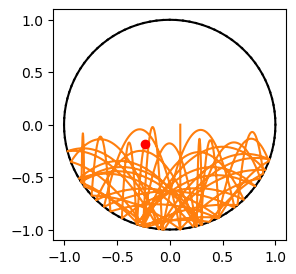

I used Verlet's integration to calculate velocties and added 'padding' to the circles edges


In [212]:
## bouncing chaotic code
import math
import matplotlib.pyplot as plt
import numpy as np

position = {'x': 0, 'y': 0}
cnvs = plt.figure(figsize=(3, 3))

ctx = cnvs.add_subplot(111)
#    global nn, x, y, vx, vy, xp, yp, x2, y2, vx2, vy2, xp2, yp2, running, trajectory

x, y = 0.100, 0
vx, vy = 0, 0
xc, yc = 0, 0

x2, y2 = 0.10001, 0
vx2, vy2 = 0, 0
x2c, yc2 = 0, 0

dt = 0.0015
g = 9.81
radius = 1.0
nmax = 195000
xp = np.zeros(nmax)
yp = np.zeros(nmax)
xb = np.zeros(nmax)
yb = np.zeros(nmax)
nb=0
nn = 0
xp[0] = x
yp[0] = y
for i in range(1, nmax):
    xp[i] = xp[0]
    yp[i] = yp[0]

xp2 = np.zeros(nmax)
yp2 = np.zeros(nmax)
xp2[0] = x2
yp2[0] = y2
for i in range(1, nmax):
    xp2[i] = xp2[0]
    yp2[i] = yp2[0]


def circle():
    n = 100
    ctx.plot(radius*np.sin(0), radius*np.cos(0), marker='o', markersize=0)
    for i in range(1, n+1):
        theta = i*2*math.pi/n
        ctx.plot(radius*np.sin(theta), radius*np.cos(theta), marker='o', markersize=0)
        ctx.plot([radius*np.sin(theta), radius*np.sin((i-1)*2*math.pi/n)],
                 [radius*np.cos(theta), radius*np.cos((i-1)*2*math.pi/n)], color="black")
circle()
for i in range(1,96500):
    nn += 1        
    x = x + vx * dt
    y = y + vy * dt
    vx = vx
    vy = vy - g * 0.5*dt
    xp[nn] = x
    yp[nn] = y

    if (math.sqrt(x * x + y * y) > 1.0):
        nb=nb+1
        xb[nb]=x
        yb[nb]=y
        xc = x
        yc = y
        xr = xp[nn - 1] - xp[nn]
        yr = yp[nn - 1] - yp[nn]
        qo = (xr * xc + yr * yc) / math.sqrt(xc * xc + yc * yc)
        dx = xp[nn - 1] - (xc + xc * qo)
        dy = yp[nn - 1] - (yc + yc * qo)

        xr = xp[nn - 1] - 2 * dx
        yr = yp[nn - 1] - 2 * dy
        vm = math.sqrt(vx * vx + vy * vy) * 0.995

        vx = (-vm * (xc - xr) / math.sqrt((xc - xr) ** 2 + (yc - yr) ** 2))
        vy = (-vm * (yc - yr) / math.sqrt((xc - xr) ** 2 + (yc - yr) ** 2))


   
print(i,nn)
## Plot the first 20000 iterations 
## NOTE:  if you change nn to much higer number you will see that the simulation 
##        did not conserve energy
nn=20000   # try 120000
ctx.plot(xp[0:nn],yp[0:nn])
ctx.plot(xp[nn],yp[nn],'ro')
plt.show()
print("I used Verlet's integration to calculate velocties and added 'padding' to the circles edges")

## Question 2 

96499 96499


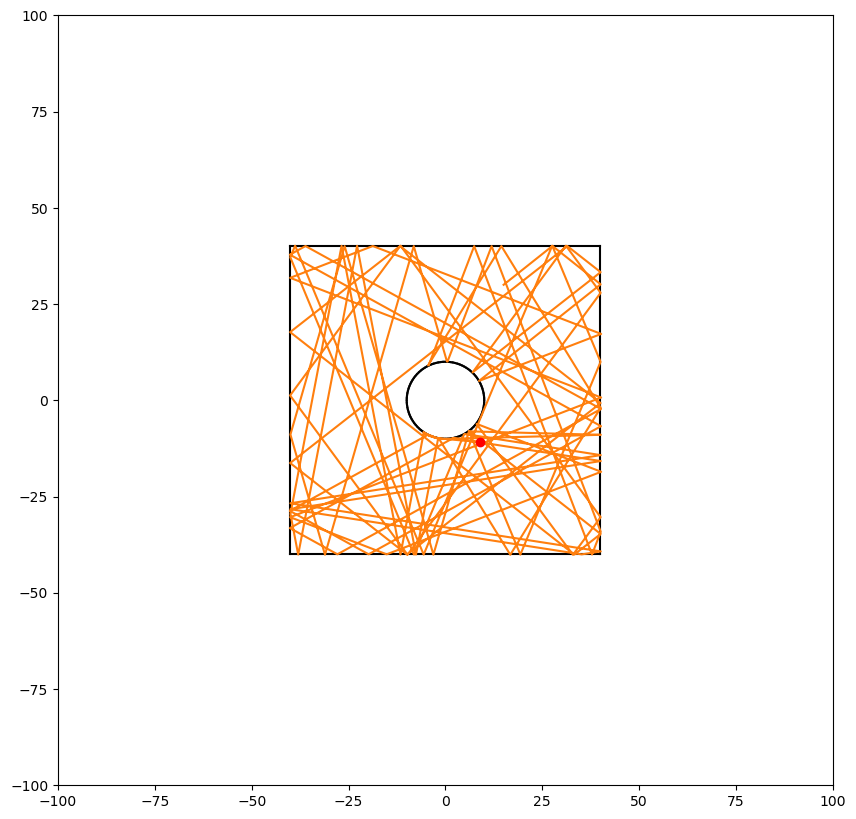

In [213]:
position = {'x': 0, 'y': 0}
cnvs = plt.figure(figsize=(10, 10))

ctx = cnvs.add_subplot(111)
ctx.plot([-40,40],[40,40], color = "0")
ctx.plot([-40,-40],[-40,40],color = "0")
ctx.plot([-40,40],[-40,-40], color = "0")
ctx.plot([40,40],[-40,40], color = "0")

def circle():
    n = 100
    radius = 10
    ctx.plot(radius*np.sin(0), radius*np.cos(0), marker='o', markersize=0)
    for i in range(1, n+1):
        theta = i*2*math.pi/n
        ctx.plot(radius*np.sin(theta), radius*np.cos(theta), marker='o', markersize=0)
        ctx.plot([radius*np.sin(theta), radius*np.sin((i-1)*2*math.pi/n)],
                 [radius*np.cos(theta), radius*np.cos((i-1)*2*math.pi/n)], color="black")
circle()
x, y = 15, 30
vx, vy = 100, 80
xc, yc = 0, 0

x2, y2 = 0.10001, 0
vx2, vy2 = 0, 0
x2c, yc2 = 0, 0

dt = 0.0015
g = 9.81
radius = 1.0
nmax = 195000
xp = np.zeros(nmax)
yp = np.zeros(nmax)
xb = np.zeros(nmax)
yb = np.zeros(nmax)
nb=0
nn = 0
xp[0] = x
yp[0] = y
for i in range(1, nmax):
    xp[i] = xp[0]
    yp[i] = yp[0]

xp2 = np.zeros(nmax)
yp2 = np.zeros(nmax)
xp2[0] = x2
yp2[0] = y2
for i in range(1,96500):
    nn += 1        
    x = x + vx * dt
    y = y + vy * dt
    vx = vx
    vy = vy
    if (x > 40 or x < -40):
        nb += 1
        xb[nb]=x
        yb[nb]=y
        vx = -vx
        vy = vy
    if (y > 40 or y < -40):
        nb += 1
        xb[nb]=x
        yb[nb]=y
        vx = vx
        vy = -vy
    if (math.sqrt(x * x + y * y) <= 10.0):
        nb += 1
        xb[nb]=x
        yb[nb]=y
        xc = x
        yc = y
        xprev = xp[nn-1]
        yprev = yp[nn-1]
        radius = math.sqrt(x * x + y * y) 
        time = np.arcsin(y/radius)
        xOfT = radius * np.cos(time)
        yOfT = radius * np.sin(time)
        TangentX = -radius * np.sin(time)
        TangentY = radius * np.cos(time)
        NormalX = - TangentY
        NormalY = TangentX
        ProjectionX = ((vx * NormalX + vy * NormalY)/(NormalX ** 2 + NormalY ** 2)) * NormalX
        ProjectionY = ((vx * NormalX + vy * NormalY)/(NormalX ** 2 + NormalY ** 2)) * NormalY
        returnX = vx - 2 * ProjectionX
        returnY = vy - 2 * ProjectionY
        vx = returnX
        vy = returnY
        if (x >= 0):
            x+=0.1
        elif (x < 0):
            x-=0.1
        if (y >= 0):
            y+=0.1
        elif (y < 0):
            y-=0.1
    xp[nn] = x
    yp[nn] = y
        
        
        
        

   
print(i,nn)
## Plot the first 20000 iterations 
## NOTE:  if you change nn to much higer number you will see that the simulation 
##        did not conserve energy
nn=20000   # try 120000
ctx.plot(xp[0:nn],yp[0:nn])
ctx.plot(xp[nn],yp[nn],'ro')

plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()

## For some reason I could not fill in the center circle, but everything works regardless!


## Logistic map for queston #3
$$ x_{n+1}=r x_n (1- tanh(x_n))$$ 

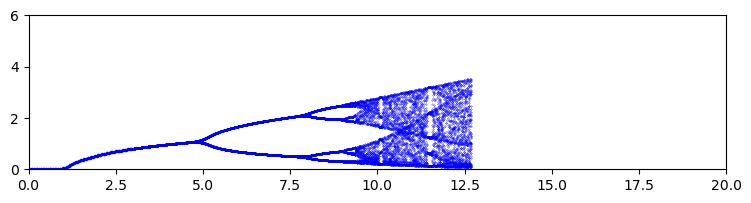

In [156]:
#plot from 0 to 3.54
Xo=0.6;
dr=.05;
rtime=3;  
nrtime=int(rtime/dr);
plt.figure(figsize=(9,2))
for i in range(0,nrtime):
    r=0+i*dr;
    xt=Xo;
    for ii in range(0,20):
        xt=r*xt*(1.-np.tanh(xt));
        if(ii > 18):
           plt.plot(r,xt,"bo", markersize=1.5)

#plot from 2.9 to 4
dr=.02;
rtime=.67  # 1.2 #.67;
nrtime=int(rtime/dr);
for i in range(0,nrtime):
    r=2.9+i*dr;
    xt=Xo;
    for ii in range(0,40):
        xt=r*xt*(1.-np.tanh(xt));
        if(ii > 30):
           plt.plot(r,xt,"bo", markersize=.75)
dr=.0025;        
rtime=1.2 #.67;
nrtime=int(rtime/dr);
for i in range(0,nrtime):
    r=3.5+i*dr;
    xt=Xo;
    for ii in range(0,40):
        xt=r*xt*(1.-np.tanh(xt));
        if(ii > 30):
           plt.plot(r,xt,"bo", markersize=.25)
dr=.005;        
rtime=3 #.67;
nrtime=int(rtime/dr);
for i in range(0,nrtime):
    r=4.7+i*dr;
    xt=Xo;
    for ii in range(0,40):
        xt=r*xt*(1.-np.tanh(xt));
        if(ii > 30):
           plt.plot(r,xt,"bo", markersize=.25)
dr=.005;        
rtime=3 #.67;
nrtime=int(rtime/dr);
for i in range(0,nrtime):
    r=7.7+i*dr;
    xt=Xo;
    for ii in range(0,40):
        xt=r*xt*(1.-np.tanh(xt));
        if(ii > 30):
           plt.plot(r,xt,"bo", markersize=.25)
dr=.005;        
rtime=1 #.67;
nrtime=int(rtime/dr);
for i in range(0,nrtime):
    r=10.7+i*dr;
    xt=Xo;
    for ii in range(0,40):
        xt=r*xt*(1.-np.tanh(xt));
        if(ii > 30):
           plt.plot(r,xt,"bo", markersize=.25)
dr=.005;        
rtime=1 #.67;
nrtime=int(rtime/dr);
for i in range(0,nrtime):
    r=11.7+i*dr;
    xt=Xo;
    for ii in range(0,40):
        xt=r*xt*(1.-np.tanh(xt));
        if(ii > 30):
           plt.plot(r,xt,"bo", markersize=.25)
plt.ylim(0., 6.)
plt.xlim(0., 20.)
plt.show()   

## I cannot make the graph go any further, it will literally fry my macbook but if continued the tangent map WILL run correctly

## Question 4

 Use any of the six (3 body gravitational problem JS) codes in this directory, and modify their initial conditions to plot 3 different unstable periodic orbits of your choosing

Chose any 3 new periodic orbits from the paper in this directory (NOTE: not all the masses are the same, so make sure you change the initial conditions and masses as needed).
Report what trajectories you see, and if they are stable for long time of for relatively short time (like the ones in codes numeber 5 and 6).

1. For the third periodic orbit, I decided to change at first just the starting position for the x and y for the third body, resulting in a trajectory where the blue drawn object flung out of the screen, with the red and green objects revolving around each other and moving at a slower speed in the opposite direction. When I changed the masses along with the initial positions (halved the mass of blue), however, the blue object flung in the right direction, and it seems the green and red interesect and have long, wide revolutions around a center point in the southwest direction. 
 
2. For the first peridic orbit, I once again only moved the third objects z position by 0.2, which, at first generated a pretty well, in tune, and periodic orbit, which derailed after a few seconds and became unstable, leading to the blue object going to the southeast, however the red and green objects orbit around each other in a stable manner and head north west. When I changed the masses along with the initial positions (doubled the mass of blue), however, the orbits around each other were very chaotic yet still kept running into each other, however after a few seconds of sparatic movement, it finally exploded, all objects leaving the frame of reference heading in seperate diretions with no stable orbits.

3. For the second periodic orbit, I went with a different route. After increasing the velocity of the first object, I found that the orbit of the body moved in the direction I increased the velocity in, developing a moving, steadily orbiting. When I changed the masses along with the initial positions (halved the mass of blue), however, the blue object flung in the right direction, and it seems the green and red interesect and have long, wide revolutions around a center point in the southwest direction. 